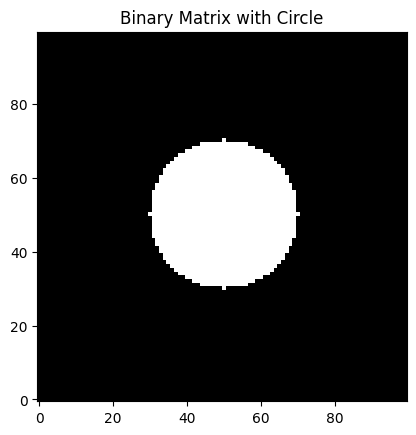

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义矩阵大小
size = 100  
binary_matrix = np.zeros((size, size))

# 圆的中心和半径
center = (50, 50)  
radius = 20        

# 填充圆形区域
for i in range(size):
    for j in range(size):
        if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
            binary_matrix[i, j] = 1

# 显示二值矩阵
plt.imshow(binary_matrix, cmap='gray', origin='lower')
plt.title("Binary Matrix with Circle")
plt.show()

最佳的 n_components: 5

==== GMM 拟合结果 ====
均值（Means）：
[[37.65000887 54.7449505 ]
 [62.05547822 44.71826843]
 [36.94452178 44.71826843]
 [49.5        48.90724123]
 [61.34999113 54.7449505 ]]

协方差矩阵（Covariances）：
[[[ 2.54114002e+01  1.29026355e+00]
  [ 1.29026355e+00  8.77515127e+00]]

 [[ 2.10953733e+01  1.29203880e+00]
  [ 1.29203880e+00  1.03637001e+01]]

 [[ 2.10953733e+01 -1.29203880e+00]
  [-1.29203880e+00  1.03637001e+01]]

 [[ 1.73460898e+01  8.75270059e-14]
  [ 8.77383653e-14  2.84583780e+01]]

 [[ 2.54114002e+01 -1.29026355e+00]
  [-1.29026355e+00  8.77515127e+00]]]

每个高斯分布的权重（Weights）：
[0.18578193 0.1881515  0.1881515  0.25213313 0.18578193]


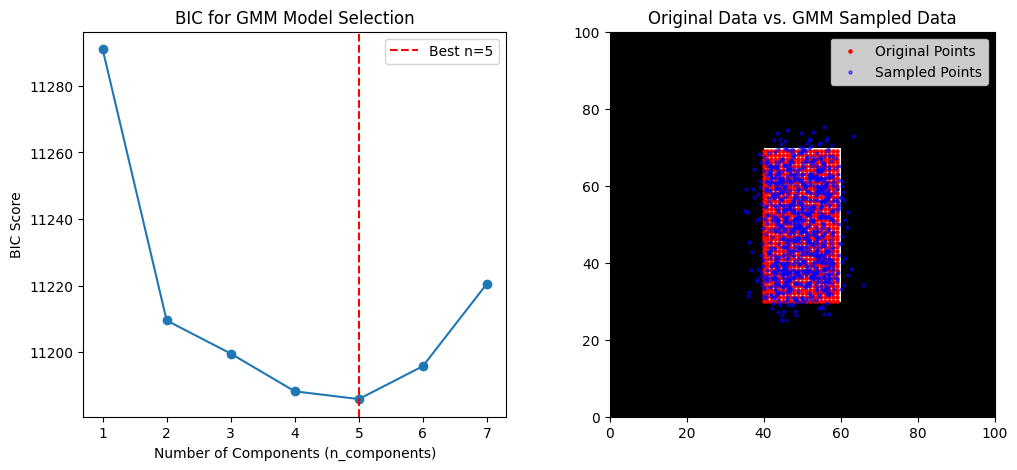

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 假设 binary_matrix 是你的二值矩阵
size = 100  
binary_matrix = np.zeros((size, size))
binary_matrix[30:70, 40:60] = 1  # 生成一个矩形形状的 1

# 获取所有值为 1 的坐标点
points = np.argwhere(binary_matrix == 1)

# 计算不同 n_components 下的 BIC 值
n_components_range = range(1, 8)  # 选择 1~8 个高斯分布进行测试
bics = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(points)
    bics.append(gmm.bic(points))  # 计算 BIC 值

# 找到 BIC 最小的 n_components
best_n = n_components_range[np.argmin(bics)]
print(f"最佳的 n_components: {best_n}")

# 重新用最佳 n_components 训练 GMM
gmm_best = GaussianMixture(n_components=best_n, covariance_type='full', random_state=42)
gmm_best.fit(points)

# 采样新数据点
sampled_points, _ = gmm_best.sample(n_samples=1000)

# 打印 GMM 拟合的参数
print("\n==== GMM 拟合结果 ====")
print(f"均值（Means）：\n{gmm_best.means_}")  
print(f"\n协方差矩阵（Covariances）：\n{gmm_best.covariances_}")  
print(f"\n每个高斯分布的权重（Weights）：\n{gmm_best.weights_}") 

# 可视化 BIC 值随 n_components 变化
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, bics, marker='o', linestyle='-')
plt.xlabel("Number of Components (n_components)")
plt.ylabel("BIC Score")
plt.title("BIC for GMM Model Selection")
plt.axvline(best_n, color='red', linestyle='--', label=f"Best n={best_n}")
plt.legend()

# 可视化采样结果
plt.subplot(1, 2, 2)
plt.imshow(binary_matrix, cmap='gray', origin='lower', extent=[0, 100, 0, 100])
plt.scatter(points[:, 1], points[:, 0], s=5, c='red', label="Original Points")
plt.scatter(sampled_points[:, 1], sampled_points[:, 0], s=5, c='blue', alpha=0.5, label="Sampled Points")
plt.legend()
plt.title("Original Data vs. GMM Sampled Data")

plt.show()


最佳的 n_components: 4
tensor([4.0000, 4.5000], dtype=torch.float64)


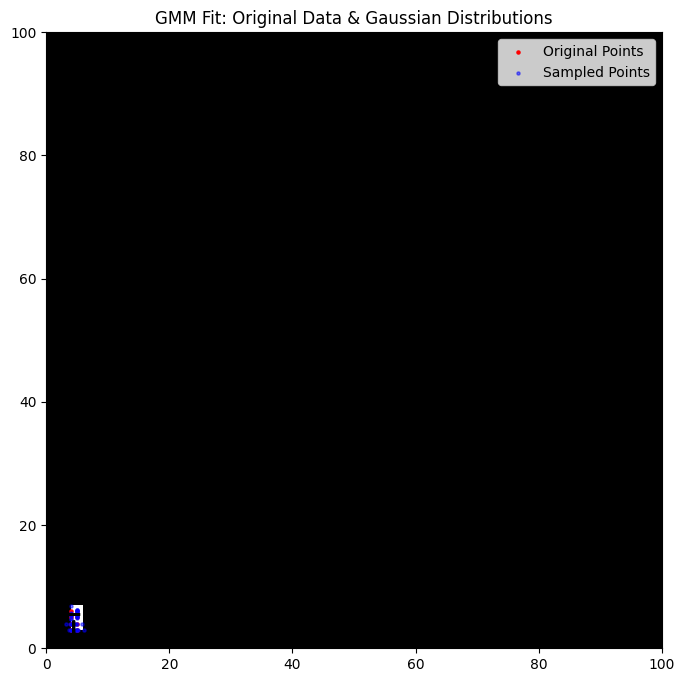

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
import torch
# 生成一个二值矩阵（矩形形状）
size = 100  
binary_matrix = np.zeros((size, size))
binary_matrix[3:7, 4:6] = 1  # 生成一个矩形形状的 1

# 获取所有值为 1 的坐标点
points = np.argwhere(binary_matrix == 1)

max_n = min(8, len(points) // 2)  # 不能超过样本点数的一半
n_components_range = range(1, max_n + 1)  # 动态调整最大值

bics = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(points)
    bics.append(gmm.bic(points))

# 找到 BIC 最小的 n_components
best_n = n_components_range[np.argmin(bics)]
print(f"最佳的 n_components: {best_n}")

# 重新用最佳 n_components 训练 GMM
gmm_best = GaussianMixture(n_components=best_n, covariance_type='full', random_state=42)
gmm_best.fit(points)

# 采样新数据点
# sampled_points, _ = gmm_best.sample(n_samples=50)

# 提取 GMM 参数
means = torch.tensor(gmm_best.means_)  # 高斯分布的中心
covariances = torch.tensor(gmm_best.covariances_)  # 协方差矩阵
weights = torch.tensor(gmm_best.weights_)  # 每个高斯的权重

print(means[0][0])
# 可视化原始数据 + GMM 拟合的高斯分布
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(binary_matrix, cmap='gray', origin='lower', extent=[0, 100, 0, 100])
ax.scatter(points[:, 1], points[:, 0], s=5, c='red', label="Original Points")
ax.scatter(sampled_points[:, 1], sampled_points[:, 0], s=5, c='blue', alpha=0.5, label="Sampled Points")
covariances
# 绘制每个高斯分布的等高线（椭圆形状）
for i in range(best_n):
    mean = means[i]
    cov = covariances[i]
    
    # 计算椭圆的长轴和短轴（特征值和特征向量）
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))  # 计算旋转角度
    
    width, height = 2 * np.sqrt(eigenvalues)  # 计算椭圆的轴长
    
    # 绘制椭圆
    ell = Ellipse(xy=(mean[1], mean[0]), width=width, height=height, angle=angle, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_patch(ell)

ax.legend()
ax.set_title("GMM Fit: Original Data & Gaussian Distributions")
plt.show()


In [ ]:
import torch

def expand_to_3D(covariances, sigma_scale):
    """
    将 (N, 2, 2) 的协方差矩阵扩展为 (N, 3, 3) 的三维协方差矩阵。
    
    规则：
    1. 提取 covariances[:, 0, 0] 和 covariances[:, 1, 1]
    2. 乘以 sigma_scale[:, 0] 和 sigma_scale[:, 1] 进行缩放
    3. 非对角线的 [0,1] 和 [1,0] 乘以 sqrt(sigma_scale[:, 0] * sigma_scale[:, 1])
    4. 在 [2,2] 位置添加 1/2 * (covariances[:, 0, 0] + covariances[:, 1, 1])

    参数：
        covariances: (N, 2, 2) 的张量
        sigma_scale: (N, 2) 的缩放张量

    返回：
        cov_3D: (N, 3, 3) 的三维协方差矩阵
    """

    # 提取 sigma_x 和 sigma_y，并进行缩放
    sigma_x = covariances[:, 0, 0] * sigma_scale[:, 0]
    sigma_y = covariances[:, 1, 1] * sigma_scale[:, 1]

    # 计算非对角线项
    scale_xy = torch.sqrt(sigma_scale[:, 0] * sigma_scale[:, 1])
    cov_xy = covariances[:, 0, 1] * scale_xy  # 由于 cov 是对称的，cov[0,1] == cov[1,0]

    # 计算新添加的 [2,2] 元素
    sigma_z = 0.5 * (sigma_x + sigma_y)

    # 初始化 (N, 3, 3) 的零矩阵
    cov_3D = torch.zeros((covariances.shape[0], 3, 3), dtype=covariances.dtype, device=covariances.device)

    # 赋值到新矩阵
    cov_3D[:, 0, 0] = sigma_x
    cov_3D[:, 1, 1] = sigma_y
    cov_3D[:, 0, 1] = cov_xy
    cov_3D[:, 1, 0] = cov_xy  # 对称性
    cov_3D[:, 2, 2] = sigma_z

    return cov_3D

# 示例数据
N = 5
cov_2D = torch.rand((N, 2, 2))
sigma_scale = torch.rand((N, 2))

cov_3D = expand_to_3D(cov_2D, sigma_scale)
print(cov_3D.shape)  # 应该输出 (N, 3, 3)
print(cov_2D)
print(cov_3D)

torch.Size([5, 3, 3])


In [ ]:
import torch
import numpy as np

def generate_3d_points(B, N, coordinate_bounds):
    """
    生成 (B, N, 3) 形状的 3D 世界坐标点，范围受 coordinate_bounds 限制。

    参数:
    - B: 批量大小
    - N: 每个 batch 生成的点数
    - coordinate_bounds: [x_min, y_min, z_min, x_max, y_max, z_max]

    返回:
    - points_3d: (B, N, 3) 3D 世界坐标
    """
    x_min, y_min, z_min, x_max, y_max, z_max = coordinate_bounds
    points_3d = torch.rand((B, N, 3), dtype=torch.float32)  # 先生成 [0,1] 之间的随机数
    points_3d[..., 0] = points_3d[..., 0] * (x_max - x_min) + x_min  # x 范围
    points_3d[..., 1] = points_3d[..., 1] * (y_max - y_min) + y_min  # y 范围
    points_3d[..., 2] = points_3d[..., 2] * (z_max - z_min) + z_min  # z 范围
    return points_3d

def project_points(points_3d, extr_np, intr_np, img_size=(128, 128)):
    B, N, _ = points_3d.shape

    # **1. NumPy 转 PyTorch**
    extr = torch.tensor(extr_np, dtype=torch.float32, device=points_3d.device)  # (4, 4)
    intr = torch.tensor(intr_np, dtype=torch.float32, device=points_3d.device)  # (3, 3)

    # **2. 扩展点为齐次坐标**
    ones = torch.ones((B, N, 1), device=points_3d.device)  # (B, N, 1)
    points_homo = torch.cat([points_3d, ones], dim=-1)  # (B, N, 4)

    # **3. 世界坐标 -> 相机坐标**
    points_camera_homo = torch.matmul(points_homo, extr.T)  # (B, N, 4)
    points_camera = points_camera_homo[..., :3]  # (B, N, 3)

    # **4. 透视投影**
    X_c, Y_c, Z_c = points_camera[..., 0], points_camera[..., 1], points_camera[..., 2]
    valid_mask = Z_c > 0  # 只投影在相机前面的点
    Z_c = torch.clamp(Z_c, min=1e-6)  # 避免除 0
    x_n = X_c / Z_c
    y_n = Y_c / Z_c

    # **5. 应用相机内参**
    fx, fy = intr[0, 0], intr[1, 1]
    cx, cy = intr[0, 2], intr[1, 2]
    u = fx * x_n + cx
    v = fy * y_n + cy

    # **6. 限制范围**
    H, W = img_size
    u = torch.clamp(u, 0, W - 1)
    v = torch.clamp(v, 0, H - 1)

    # 标记无效点
    u[~valid_mask] = -1
    v[~valid_mask] = -1

    return torch.stack([u, v], dim=-1)  # (B, N, 2)

# **参数**
B, N = 2, 2  # 2 个 batch，每个 batch 5 个点
coordinate_bounds = [-0.3, -0.5, 0.6, 0.7, 0.5, 1.6]  # 3D 点范围

# **生成 3D 世界坐标**
points_3d = generate_3d_points(B, N, coordinate_bounds)

# **外参 (NumPy)**
extr_np = np.array([
    [-0.863209, -0.213358, -0.457547, 0.842468],
    [-0.504848, 0.364807, 0.782333, -0.884787],
    [-0.000001, 0.906308, -0.422618, 1.579998],
    [0, 0, 0, 1]
])

# **内参 (NumPy)**
intr_np1 = np.array([
    [-110.851248, 0, 64],
    [0, -110.851248, 64],
    [0, 0, 1]
])
intr_np2 = np.array([
    [110.851248, 0, 64],
    [0, 110.851248, 64],
    [0, 0, 1]
])
# **计算投影坐标**
points_2d_1 = project_points(points_3d, extr_np, intr_np1)
points_2d_2 = project_points(points_3d, extr_np, intr_np2)


print("3D 点 (世界坐标):\n", points_3d)
print("2D 投影坐标 (图像坐标)1:\n", points_2d_1)
print("2D 投影坐标 (图像坐标)2:\n", points_2d_2)


3D 点 (世界坐标):
 tensor([[[ 0.5823,  0.3017,  1.0053],
         [ 0.1389,  0.1676,  1.0692]],

        [[-0.2820, -0.3926,  1.0486],
         [ 0.1935,  0.4009,  1.5868]]])
2D 投影坐标 (图像坐标)1:
 tensor([[[78.3201, 85.8946],
         [46.8887, 68.9665]],

        [[ 0.0000, 73.2693],
         [75.8565, 28.7108]]])
2D 投影坐标 (图像坐标)2:
 tensor([[[ 49.6799,  42.1054],
         [ 81.1113,  59.0335]],

        [[127.0000,  54.7307],
         [ 52.1435,  99.2892]]])


tensor([[[8.5176e+00, 2.0672e+01],
         [1.0660e+02, 7.7398e+01],
         [5.5851e+01, 1.2519e+01],
         [7.0236e+01, 2.3572e+01],
         [5.7259e+01, 8.7834e+01],
         [1.2512e+02, 3.0611e+01],
         [5.3981e+01, 5.1199e+01],
         [9.8411e+01, 2.8171e+01],
         [1.7243e+01, 8.9421e+01],
         [1.1380e+02, 6.1087e+00],
         [4.8460e+01, 5.1241e+01],
         [1.1264e+02, 2.2626e+01],
         [9.0308e+01, 1.1194e+01],
         [1.4197e+01, 2.6563e+01],
         [1.2454e+02, 3.4298e+01],
         [1.1590e+02, 1.7933e+01],
         [7.5558e+01, 4.3398e+01],
         [8.3343e+01, 3.2680e+01],
         [1.3745e+01, 6.2856e+01],
         [3.9004e+01, 1.0824e+02],
         [6.4486e+01, 9.3444e+01],
         [8.4004e+01, 1.1205e+02],
         [1.2271e+02, 1.2506e+02],
         [1.2702e+02, 3.3136e+01],
         [1.8147e+01, 4.1018e+01],
         [8.6362e+01, 9.7062e+01],
         [5.9492e+01, 6.5988e+01],
         [3.4121e+00, 3.8143e+01],
         [7.2301e+01

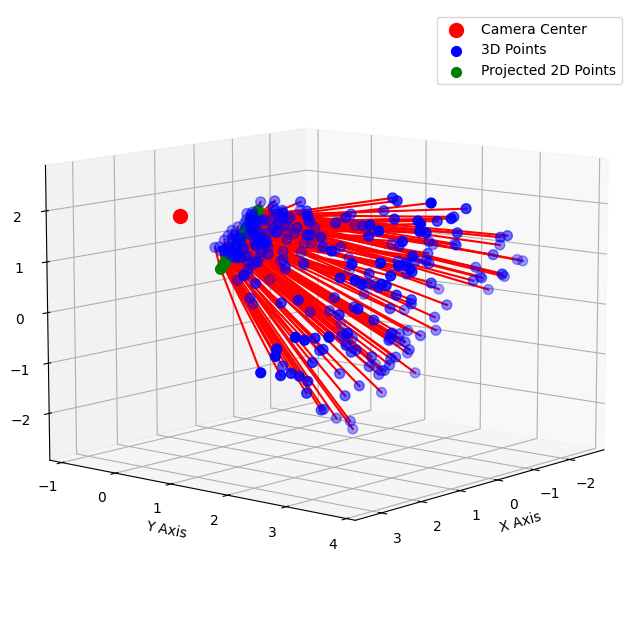

In [1]:
import torch.nn as nn
import numpy as np
import torch

image_resolution = 128
depth_act = nn.Sigmoid()


def init_ray_dirs():
    x = torch.linspace(-image_resolution // 2 + 0.5, 
                        image_resolution // 2 - 0.5, 
                        image_resolution) 
    y = torch.linspace( image_resolution // 2 - 0.5, 
                    -image_resolution // 2 + 0.5, 
                        image_resolution)

    grid_x, grid_y = torch.meshgrid(x, y, indexing='xy')
    ones = torch.ones_like(grid_x, dtype=grid_x.dtype)
    ray_dirs = torch.stack([grid_x, grid_y, ones]).unsqueeze(0)

    ray_dirs[:, :2, ...] /= abs(110.851248)

    return ray_dirs

def getView2World(R, t, translate=np.array([.0, .0, .0]), scale=1.0):
    Rt = np.zeros((4, 4))
    Rt[:3, :3] = R.transpose()
    Rt[:3, 3] = t
    Rt[3, 3] = 1.0

    C2W = np.linalg.inv(Rt)
    cam_center = C2W[:3, 3]
    cam_center = (cam_center + translate) * scale
    C2W[:3, 3] = cam_center
    Rt = C2W
    return np.float32(Rt)

def world_to_canonical(xyz, coordinate_bounds=[-0.3, -0.5, 0.6, 0.7, 0.5, 1.6]):
    """
    :param xyz (B, N, 3) or (B, 3, N)
    :return (B, N, 3) or (B, 3, N)

    transform world coordinate to canonical coordinate with bounding box
    """
    xyz = xyz.clone()
    bb_min = coordinate_bounds[:3]
    bb_max = coordinate_bounds[3:]
    bb_min = torch.tensor(bb_min, device=xyz.device).unsqueeze(0).unsqueeze(0) if xyz.shape[-1] == 3 \
        else torch.tensor(bb_min, device=xyz.device).unsqueeze(-1).unsqueeze(0)
    bb_max = torch.tensor(bb_max, device=xyz.device).unsqueeze(0).unsqueeze(0) if xyz.shape[-1] == 3 \
        else torch.tensor(bb_max, device=xyz.device).unsqueeze(-1).unsqueeze(0)
    xyz -= bb_min
    xyz /= (bb_max - bb_min)

    return xyz

def getWorld2View2(R, t, translate=np.array([.0, .0, .0]), scale=1.0):
    Rt = np.zeros((4, 4))
    Rt[:3, :3] = R.transpose()
    Rt[:3, 3] = t
    Rt[3, 3] = 1.0

    C2W = np.linalg.inv(Rt)
    cam_center = C2W[:3, 3]
    cam_center = (cam_center + translate) * scale
    C2W[:3, 3] = cam_center
    Rt = np.linalg.inv(C2W)
    return np.float32(Rt)
'''

rays position:

       (-127.5, 127.5)       (0, 127.5)       (127.5, 127.5)
          +---------------------+--------------------+
          |                     |                    |
          |                     |                    |
 (-127.5, 0) +----------------- (0,0) --------------+ (127.5, 0)
          |                     |                    |
          |                     |                    |
          +---------------------+--------------------+
       (-127.5, -127.5)      (0, -127.5)      (127.5, -127.5)

'''
znear = 1
zfar = 4.0

def pos_expand_to_3D(filtered_rays, depth_network_single_view, extr):
    
    # 计算相机坐标系下的点坐标
    # 变为正
    depth = znear + depth_act(depth_network_single_view) * (zfar - znear)   # (N, 1)

    # radius
    pos = filtered_rays * depth  # (N, 3)
    # 转换为齐次坐标 (N, 4)，第四维补 1
    ones = torch.ones((pos.shape[0], 1), dtype=pos.dtype, device=pos.device)  # (N, 1)
    pos_homogeneous = torch.cat([pos, ones], dim=-1)  # (N, 4)

    # c2w
    R = np.array(extr[:3, :3], np.float32).T  # (3, 3) 变换矩阵
    T = np.array(extr[:3, 3], np.float32)  # (3,) 平移向量
    c2w_matrix = getView2World(R, T)  # 获取 c2w 变换矩阵
    # 转换 `extr` 到 tensor
    c2w_matrix = torch.tensor(c2w_matrix, dtype=torch.float32, device=pos.device)  # (4, 4)
    # 变换到世界坐标 (N, 4)
    pos_world_homogeneous = pos_homogeneous @ c2w_matrix.T  # (N, 4)

    # 去掉最后一维 (w)，得到最终的 (N, 3)
    pos_world = pos_world_homogeneous[:, :3]  # (N, 3)

    pos_world = pos_world.unsqueeze(0)
    # 转换到 canonical 空间
    pos_canonical = world_to_canonical(pos_world)  # (N, 3)

    return pos_world     # (N, 3)

def filter_ray_(ray_dirs, coords: torch.Tensor):
        assert coords.shape[2] == 2, "坐标应当是 (B, N, 2) 形式的 (row, col) 对"

        # 去掉 batch 维度，变成 (3, H, W)
        ray_dirs = ray_dirs.squeeze(0)  # 假设 ray_dirs 的形状是 (1, 3, H, W)
        
        # 获取 B, N
        B, N, _ = coords.shape
        
        # 提取 row 和 col，并确保它们在相同设备
        row = coords[:, :, 1].long()  # (B, N)
        col = coords[:, :, 0].long()  # (B, N)
        # 使用 advanced indexing 获取每个 batch 中的 ray_dirs 中对应的方向向量
        filtered_rays = ray_dirs[:, row, col].permute(1, 2, 0)  # (B, N, 3)
        return filtered_rays
    
    
def generate_depth(N):
    """
    生成形状为 (N, 1) 的张量，范围在 (-5, 5) 之间。

    参数:
    - N: 点的数量

    返回:
    - depth: (N, 1) 的张量，范围在 (-5, 5) 之间
    """
    depth = torch.rand((N, 1)) * 10 - 5  # 生成 [0,1) 的随机数，然后映射到 (-5, 5)
    return depth

def single_batch_2d_to_3d(filter_ray, depth, extr):

    return pos_expand_to_3D(filter_ray, depth, extr)
    
    
def generate_2d_points(B, N, coordinate_bounds):
    """
    生成 (B, N, 2) 形状的 2D 坐标点，范围受 coordinate_bounds 限制。

    参数:
    - B: 批量大小
    - N: 每个 batch 生成的点数
    - coordinate_bounds: [x_min, y_min, x_max, y_max]

    返回:
    - points_2d: (B, N, 2) 2D 坐标
    """
    x_min, y_min, x_max, y_max = coordinate_bounds
    points_2d = torch.rand((B, N, 2), dtype=torch.float32)  # 先生成 [0,1] 之间的随机数
    points_2d[..., 0] = points_2d[..., 0] * (x_max - x_min) + x_min  # x 范围
    points_2d[..., 1] = points_2d[..., 1] * (y_max - y_min) + y_min  # y 范围
    return points_2d

def project_points(points_3d, extr_np, intr_np, img_size=(image_resolution, image_resolution)):
    """
    将 3D 点投影到 2D 图像平面（无 batch 维度）。

    参数:
    - points_3d: (N, 3) 的 Tensor，表示 N 个 3D 点
    - extr_np: (4, 4) 的 NumPy 数组，表示外参矩阵
    - intr_np: (3, 3) 的 NumPy 数组，表示内参矩阵
    - img_size: (H, W) 图像尺寸

    返回:
    - (N, 2) 的 Tensor，存储投影后的 2D 像素坐标
    """

    N, _ = points_3d.shape

    # **1. NumPy 转 PyTorch**
    extr = torch.tensor(extr_np, dtype=torch.float32, device=points_3d.device)  # (4, 4)
    intr = torch.tensor(intr_np, dtype=torch.float32, device=points_3d.device)  # (3, 3)

    # **2. 扩展点为齐次坐标**
    ones = torch.ones((N, 1), device=points_3d.device)  # (N, 1)
    points_homo = torch.cat([points_3d, ones], dim=-1)  # (N, 4)

    # **3. 世界坐标 -> 相机坐标**
    R = np.array(extr_np[:3, :3], np.float32).T  # (3, 3) 变换矩阵
    T = np.array(extr_np[:3, 3], np.float32)  # (3,) 平移向量
    matrix = getWorld2View2(R, T)
    
    points_camera_homo = points_homo @ matrix.T  # (N, 4)
    points_camera = points_camera_homo[..., :3]  # (N, 3)

    # **4. 透视投影**
    X_c, Y_c, Z_c = points_camera[:, 0], points_camera[:, 1], points_camera[:, 2]
    valid_mask = Z_c > 0  # 只投影在相机前面的点
    Z_c = torch.clamp(Z_c, min=1e-6)  # 避免除 0
    x_n = X_c / Z_c
    y_n = Y_c / Z_c

    # **5. 应用相机内参**
    fx, fy = abs(intr[0, 0]), abs(intr[1, 1])
    cx, cy = intr[0, 2], intr[1, 2]
    u = fx * x_n + cx
    v = fy * y_n + cy

    # **6. 限制范围**
    H, W = img_size
    u = torch.clamp(u, 0, W - 1)
    v = torch.clamp(v, 0, H - 1)

    # 标记无效点
    u[~valid_mask] = -1
    v[~valid_mask] = -1

    return torch.stack([u, v], dim=-1)  # (N, 2)

def convert_image_to_camera_coords(points, image_width, image_height):
    """
    将 (B, N, 2) 形状的图像坐标系 (左上角原点) 转换为相机归一化坐标系 (中心为原点)
    
    参数：
        points: (B, N, 2) numpy 数组，每个点是 [u, v]，表示图像坐标
        image_width: 图像宽度 W
        image_height: 图像高度 H
    
    返回：
        transformed_points: (B, N, 2) numpy 数组，每个点是 [x, y]，表示相机坐标
    """
    # 拆分 u, v
    u, v = points[..., 0], points[..., 1]  # 形状: (B, N)
    
    # 变换
    x = u - (image_width / 2) + 0.5
    y = (image_height / 2) - v - 0.5  # 翻转 y 轴
    
    return np.stack([x, y], axis=-1)  # (B, N, 2)

def flip_y_axis(points_2d, img_size):
    """
    对 2D 点的 y 坐标进行翻转，使其关于图像的水平中轴线对称。
    
    参数:
    - points_2d: (B, N, 2) 的 Tensor，存储 (x, y) 坐标
    - img_size: (H, W) 图像尺寸
    
    返回:
    - 转换后的 (B, N, 2) Tensor
    """
    H = img_size  # 获取图像高度 H
    flipped_points = points_2d.clone()
    flipped_points[..., 1] = H - points_2d[..., 1]  # y' = H - y
    return flipped_points


# 生成二维点
B, N = 1, 300
coordinate_bounds = [0, 0, image_resolution, image_resolution]
points_2d = generate_2d_points(B, N, coordinate_bounds)  # 左上角坐标系（左手系）



extr_np = np.array([
    [-0.863209, -0.213358, -0.457547, 0.842468],
    [-0.504848, 0.364807, 0.782333, -0.884787],
    [-0.000001, 0.906308, -0.422618, 1.579998],
    [0, 0, 0, 1]
])

# **内参 (NumPy)**
intr_np = np.array([
    [-110.851248, 0, 64],
    [0, -110.851248, 64],
    [0, 0, 1]
])


ray_dirs = init_ray_dirs()
points_2d_fipped = flip_y_axis(points_2d, image_resolution)   # 左下角坐标系（右手系）
filter_ray = filter_ray_(ray_dirs, points_2d)          # 相机坐标系（中心，右手系）
points_2d_cam = torch.tensor(convert_image_to_camera_coords(points_2d, image_resolution, image_resolution))


# 进行2d->3d投影
points_3d = []  # 世界坐标系
for i in range(B):
    depth = generate_depth(N)
    points_3d.append(single_batch_2d_to_3d(filter_ray[i], depth, extr_np))
points_3d = torch.cat(points_3d, dim=0)
print(points_2d)               
print(points_3d)

points_2d_project = []
for i in range(B):
    # 进行3d->2d投影
    points_2d_project.append(project_points(points_3d[i], extr_np, intr_np))
points_2d_project = flip_y_axis(torch.stack(points_2d_project, dim=0), image_resolution)

print(points_2d_project)        # 左上角坐标系（左手系）


import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === 1. 相机参数 ===
extr_np = np.array([
    [-0.863209, -0.213358, -0.457547, 0.842468],
    [-0.504848,  0.364807,  0.782333, -0.884787],
    [-0.000001,  0.906308, -0.422618,  1.579998],
    [0, 0, 0, 1]
])
intr_np = np.array([
    [110.851248, 0, 64],
    [0, 110.851248, 64],
    [0, 0, 1]
])

# === 2. 你的 Tensor 转换成 NumPy ===
points_2d_project_torch = points_2d_fipped

points_3d_torch = points_3d

points_2d_project = points_2d_project_torch.numpy()[0]  # (10, 2)
points_3d = points_3d_torch.numpy()[0]  # (10, 3)

# === 3. 计算投影 2D 点的 3D 位置 ===
K_inv = np.linalg.inv(intr_np)  # 计算内参逆矩阵
points_2d_h = np.hstack((points_2d_project, np.ones((points_2d_project.shape[0], 1))))  # 齐次坐标
points_2d_cam = (K_inv @ points_2d_h.T).T  # 2D 变换到相机坐标系
points_2d_cam /= points_2d_cam[:, 2:]  # 归一化

# 变换到世界坐标系
camera_center = extr_np[:3, 3]  # 相机位置
points_2d_world = (extr_np[:3, :3] @ points_2d_cam.T).T + camera_center

# === 4. 绘制 3D 视图 ===
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制相机位置
ax.scatter(*camera_center, color='red', s=100, label="Camera Center")

# 绘制 3D 世界点
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], color='blue', s=50, label="3D Points")

# 绘制投影 2D 点
ax.scatter(points_2d_world[:, 0], points_2d_world[:, 1], points_2d_world[:, 2], color='green', s=50, label="Projected 2D Points")

# 画红色连线连接 3D 点和投影点
for p3d, p2d in zip(points_3d, points_2d_world):
    ax.plot([p3d[0], p2d[0]], [p3d[1], p2d[1]], [p3d[2], p2d[2]], color='red')
    
ax.view_init(elev=10, azim=40)  # 设置视角

# 轴标签
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.legend()

plt.show()


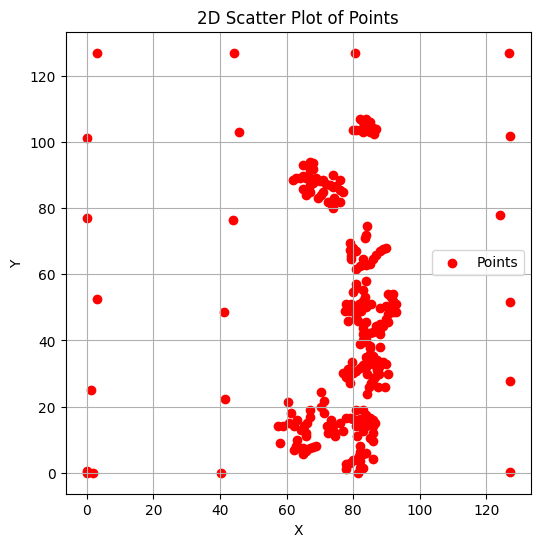

In [ ]:
import matplotlib.pyplot as plt
import torch

# 原始数据
data = torch.tensor([[7.7261e-02, 0.0000e+00],
        [4.0362e+01, 0.0000e+00],
        [1.2700e+02, 3.2846e-01],
        [1.1346e+00, 2.4955e+01],
        [4.1626e+01, 2.2167e+01],
        [8.4083e+01, 2.3877e+01],
        [1.2700e+02, 2.7682e+01],
        [2.9332e+00, 5.2505e+01],
        [4.1136e+01, 4.8568e+01],
        [1.2700e+02, 5.1513e+01],
        [0.0000e+00, 7.6911e+01],
        [4.3962e+01, 7.6318e+01],
        [8.4297e+01, 7.4585e+01],
        [1.2411e+02, 7.7801e+01],
        [0.0000e+00, 1.0113e+02],
        [4.5799e+01, 1.0297e+02],
        [1.2700e+02, 1.0188e+02],
        [3.0400e+00, 1.2700e+02],
        [4.4192e+01, 1.2700e+02],
        [8.0477e+01, 1.2700e+02],
        [1.2674e+02, 1.2700e+02],
        [1.8861e+00, 0.0000e+00],
        [0.0000e+00, 5.3981e-01],
        [0.0000e+00, 0.0000e+00],
        [8.3000e+01, 1.4997e+01],
        [8.1000e+01, 1.8948e+01],
        [8.1225e+01, 1.1000e+01],
        [8.4000e+01, 1.7411e+01],
        [7.8000e+01, 1.6500e+01],
        [8.4000e+01, 1.4042e+01],
        [8.0000e+01, 1.6131e+01],
        [8.3000e+01, 1.2485e+01],
        [8.1000e+01, 1.4020e+01],
        [8.3000e+01, 1.8954e+01],
        [8.5000e+01, 1.6500e+01],
        [8.2000e+01, 1.6324e+01],
        [7.9000e+01, 1.6500e+01],
        [8.3000e+01, 5.8009e+00],
        [8.6000e+01, 1.2054e+01],
        [8.1000e+01, 3.8740e+00],
        [8.1516e+01, 0.0000e+00],
        [8.5000e+01, 1.0500e+01],
        [7.8000e+01, 2.4999e+00],
        [8.2000e+01, 8.0000e+00],
        [8.6000e+01, 1.6000e+01],
        [8.2000e+01, 3.4945e+00],
        [7.8000e+01, 1.0000e+00],
        [8.3000e+01, 1.5168e+00],
        [8.6000e+01, 9.6668e+00],
        [8.2000e+01, 1.4642e+00],
        [8.6000e+01, 4.0000e+00],
        [8.6501e+01, 1.5000e+01],
        [8.2000e+01, 6.4087e+00],
        [7.9000e+01, 2.8477e+00],
        [8.4000e+01, 5.8450e+00],
        [8.6000e+01, 1.4000e+01],
        [8.1928e+01, 5.0000e+00],
        [8.0000e+01, 3.8872e+00],
        [9.2000e+01, 4.8509e+01],
        [7.9413e+01, 5.1000e+01],
        [8.5503e+01, 5.1000e+01],
        [8.1367e+01, 4.6000e+01],
        [7.7486e+01, 4.9000e+01],
        [9.2000e+01, 5.2000e+01],
        [8.3969e+01, 5.0000e+01],
        [9.0500e+01, 4.5500e+01],
        [8.1764e+01, 5.1000e+01],
        [7.9000e+01, 4.9000e+01],
        [8.1000e+01, 4.7000e+01],
        [8.3502e+01, 5.3000e+01],
        [8.1009e+01, 4.8000e+01],
        [8.2433e+01, 4.9000e+01],
        [9.0500e+01, 5.4000e+01],
        [8.8000e+01, 4.5000e+01],
        [8.4000e+01, 5.1000e+01],
        [7.8492e+01, 4.6000e+01],
        [7.8000e+01, 5.1000e+01],
        [8.0146e+01, 5.0000e+01],
        [9.3000e+01, 4.8500e+01],
        [9.0526e+01, 4.8000e+01],
        [8.3000e+01, 5.2000e+01],
        [9.1501e+01, 5.3000e+01],
        [8.1000e+01, 4.8000e+01],
        [5.8000e+01, 9.0000e+00],
        [6.6000e+01, 6.6998e+00],
        [7.1398e+01, 2.1811e+01],
        [7.7000e+01, 1.2734e+01],
        [6.4000e+01, 7.5979e+00],
        [6.0333e+01, 2.1333e+01],
        [6.9000e+01, 8.0000e+00],
        [7.2514e+01, 1.2000e+01],
        [6.5000e+01, 5.5140e+00],
        [6.3121e+01, 1.0000e+01],
        [6.5974e+01, 1.2000e+01],
        [7.0501e+01, 2.4491e+01],
        [6.8000e+01, 7.6312e+00],
        [7.4501e+01, 1.1000e+01],
        [7.4486e+01, 1.2000e+01],
        [6.2400e+01, 6.8000e+00],
        [6.7000e+01, 7.4251e+00],
        [6.5000e+01, 7.4860e+00],
        [6.3000e+01, 8.0000e+00],
        [6.5772e+01, 1.1000e+01],
        [8.4118e+01, 3.0000e+01],
        [9.0000e+01, 3.3000e+01],
        [7.7000e+01, 3.0026e+01],
        [8.9000e+01, 3.3402e+01],
        [8.5879e+01, 3.3000e+01],
        [8.1000e+01, 3.0736e+01],
        [8.2000e+01, 3.1732e+01],
        [8.5393e+01, 2.7000e+01],
        [8.7868e+01, 3.0000e+01],
        [9.0559e+01, 3.0000e+01],
        [8.4790e+01, 2.6000e+01],
        [8.7068e+01, 3.4000e+01],
        [7.8000e+01, 2.9000e+01],
        [8.4317e+01, 3.4000e+01],
        [8.4000e+01, 3.2000e+01],
        [8.7896e+01, 3.2000e+01],
        [8.9571e+01, 2.6000e+01],
        [8.7356e+01, 2.6000e+01],
        [8.3000e+01, 3.2435e+01],
        [8.0000e+01, 3.0219e+01],
        [8.7075e+01, 3.1000e+01],
        [8.6467e+01, 2.9000e+01],
        [8.5961e+01, 2.8000e+01],
        [8.5000e+01, 3.8437e+01],
        [0.0000e+00, 0.0000e+00],
        [7.8500e+01, 2.8500e+01],
        [9.1000e+01, 4.9800e+01],
        [8.4000e+01, 4.5501e+01],
        [8.3000e+01, 3.9500e+01],
        [8.8000e+01, 4.3495e+01],
        [8.8000e+01, 3.8083e+01],
        [8.2958e+01, 4.0043e+01],
        [7.8571e+01, 3.1286e+01],
        [8.6000e+01, 4.2500e+01],
        [8.8000e+01, 4.9843e+01],
        [8.5000e+01, 3.7582e+01],
        [9.0000e+01, 5.0488e+01],
        [9.2000e+01, 5.0000e+01],
        [8.6000e+01, 3.5364e+01],
        [9.3000e+01, 5.1000e+01],
        [8.9000e+01, 4.4500e+01],
        [8.4000e+01, 4.0256e+01],
        [8.8000e+01, 4.2000e+01],
        [8.4000e+01, 3.5000e+01],
        [8.3000e+01, 4.1840e+01],
        [8.3000e+01, 4.3884e+01],
        [9.0000e+01, 4.6497e+01],
        [8.2000e+01, 3.9000e+01],
        [8.7000e+01, 4.4500e+01],
        [9.2000e+01, 5.1000e+01],
        [8.5000e+01, 3.6015e+01],
        [9.2000e+01, 5.4000e+01],
        [8.5000e+01, 4.2230e+01],
        [8.7000e+01, 6.5825e+01],
        [7.9000e+01, 2.7000e+01],
        [8.3951e+01, 7.2000e+01],
        [8.0000e+01, 5.4500e+01],
        [8.3000e+01, 6.4487e+01],
        [8.8000e+01, 6.7000e+01],
        [7.9000e+01, 6.7342e+01],
        [7.9667e+01, 3.3333e+01],
        [8.1000e+01, 5.6000e+01],
        [8.2000e+01, 6.2396e+01],
        [8.1000e+01, 6.1554e+01],
        [8.6000e+01, 6.4613e+01],
        [8.4000e+01, 5.8000e+01],
        [9.0000e+01, 6.8000e+01],
        [8.0000e+01, 6.7993e+01],
        [8.4000e+01, 6.2734e+01],
        [7.9000e+01, 6.9418e+01],
        [8.1000e+01, 5.7138e+01],
        [8.3000e+01, 5.5382e+01],
        [8.1000e+01, 6.6928e+01],
        [7.9482e+01, 6.4518e+01],
        [8.5000e+01, 6.3050e+01],
        [8.3000e+01, 6.3000e+01],
        [8.3447e+01, 7.1000e+01],
        [8.9000e+01, 6.7500e+01],
        [7.9456e+01, 6.5544e+01],
        [5.7325e+01, 1.4000e+01],
        [6.7000e+01, 1.7000e+01],
        [7.6000e+01, 1.5000e+01],
        [7.3269e+01, 1.6000e+01],
        [5.8960e+01, 1.4000e+01],
        [6.5372e+01, 1.4000e+01],
        [6.0854e+01, 1.5000e+01],
        [6.2334e+01, 1.4000e+01],
        [6.4500e+01, 1.3000e+01],
        [7.0500e+01, 2.0000e+01],
        [7.4000e+01, 1.4000e+01],
        [6.6010e+01, 1.5000e+01],
        [6.1239e+01, 1.8000e+01],
        [6.7000e+01, 1.9000e+01],
        [7.1338e+01, 1.8000e+01],
        [7.2260e+01, 1.4000e+01],
        [6.3212e+01, 1.6000e+01],
        [6.3000e+01, 8.9000e+01],
        [7.4000e+01, 8.6536e+01],
        [6.8000e+01, 9.3680e+01],
        [7.2472e+01, 8.2000e+01],
        [6.8000e+01, 8.7660e+01],
        [7.6000e+01, 8.2000e+01],
        [7.1000e+01, 8.8430e+01],
        [6.5000e+01, 9.3081e+01],
        [6.5737e+01, 8.4000e+01],
        [6.5000e+01, 8.9804e+01],
        [7.5000e+01, 8.6644e+01],
        [6.8000e+01, 9.1886e+01],
        [7.1000e+01, 8.5000e+01],
        [6.7000e+01, 8.5000e+01],
        [7.4291e+01, 8.3000e+01],
        [7.4000e+01, 9.0000e+01],
        [6.7000e+01, 9.1481e+01],
        [7.3000e+01, 8.7125e+01],
        [6.7000e+01, 8.6993e+01],
        [7.0000e+01, 8.8100e+01],
        [7.3996e+01, 8.0000e+01],
        [7.6000e+01, 8.5517e+01],
        [6.6000e+01, 8.9146e+01],
        [6.4000e+01, 8.9219e+01],
        [6.2000e+01, 8.8500e+01],
        [6.9000e+01, 8.9254e+01],
        [7.2000e+01, 8.7158e+01],
        [6.7000e+01, 9.4000e+01],
        [6.7000e+01, 8.9000e+01],
        [6.5000e+01, 8.5644e+01],
        [7.3764e+01, 8.1000e+01],
        [6.9372e+01, 8.3000e+01],
        [7.0363e+01, 8.4000e+01],
        [7.6000e+01, 8.8557e+01],
        [7.7000e+01, 8.4800e+01],
        [8.5000e+01, 1.0317e+02],
        [8.5000e+01, 1.0600e+02],
        [8.1000e+01, 1.0350e+02],
        [8.7000e+01, 1.0400e+02],
        [8.4000e+01, 1.0358e+02],
        [8.6337e+01, 1.0234e+02],
        [8.0000e+01, 1.0350e+02],
        [8.3000e+01, 1.0600e+02],
        [8.6000e+01, 1.0438e+02],
        [8.4001e+01, 1.0700e+02],
        [8.2000e+01, 1.0350e+02],
        [8.2000e+01, 1.0700e+02],
        [8.3000e+01, 1.0304e+02],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]]
)

# 过滤掉所有 (0, 0) 的点
filtered_data = data[(data[:, 0] != 0) | (data[:, 1] != 0)]

# 提取 x 和 y 坐标
x = filtered_data[:, 0].numpy()
y = filtered_data[:, 1].numpy()

# 绘制散点图
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c='red', label='Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Scatter Plot of Points")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.distributions as dist

def gmm_loss(points, weights, means, covariances):
    """
    计算点云与GMM的负对数似然损失
    Args:
        points: (N, 3) 点云
        weights: (K,) 高斯混合权重（π）
        means: (K, 3) 高斯分布的均值
        covariances: (K, 3, 3) 高斯分布的协方差矩阵

    Returns:
        nll_loss: 负对数似然损失
    """
    N, _ = points.shape
    K = weights.shape[0]

    # 计算GMM的概率密度
    gmm_density = torch.zeros(N, device=points.device)

    for k in range(K):
        # 多元高斯分布
        mvn = dist.MultivariateNormal(means[k], covariance_matrix=covariances[k])
        # 计算每个点在当前高斯分布下的概率密度
        prob = mvn.log_prob(points).exp()  # 转为概率密度
        gmm_density += weights[k] * prob

    # 避免数值问题，加上一个小常数
    eps = 1e-8
    gmm_density = torch.clamp(gmm_density, min=eps)

    # 计算负对数似然损失
    nll_loss = -torch.log(gmm_density).mean()

    return nll_loss


import numpy as np

# 模拟点云数据 (N, 3)
N = 1000
points = torch.tensor(np.random.randn(N, 3), dtype=torch.float32)

# GMM 参数
K = 5  # 高斯混合分布数量
weights = torch.softmax(torch.randn(K), dim=0)  # 权重
means = torch.randn(K, 3)  # 每个高斯分布的均值
covariances = torch.eye(3).repeat(K, 1, 1)  # 协方差矩阵 (K, 3, 3)

# 计算 GMM 损失
loss = gmm_loss(points, weights, means, covariances)
print(f"GMM Loss: {loss.item():.4f}")

GMM Loss: 5.0537


In [ ]:
import torch
import numpy as np

def sample_gmm(n_samples, weights, means, covariances):
    """
    从GMM中采样点云数据
    Args:
        n_samples: 采样点数
        weights: (K,) 高斯混合权重
        means: (K, 3) 高斯均值
        covariances: (K, 3, 3) 高斯协方差矩阵

    Returns:
        samples: (n_samples, 3) 采样点
    """
    K = len(weights)
    
    # 根据权重分布决定采样属于哪个高斯分布
    components = torch.multinomial(weights, n_samples, replacement=True)

    # 初始化采样点云
    samples = torch.zeros(n_samples, 3)

    # 按照高斯分布采样
    for k in range(K):
        mask = (components == k)  # 当前分布的mask
        num_samples = mask.sum().item()
        
        if num_samples > 0:
            mvn = torch.distributions.MultivariateNormal(means[k], covariance_matrix=covariances[k])
            samples[mask] = mvn.sample((num_samples,))
    
    return samples

# GMM 参数
K = 5  # 高斯混合分布数量
weights = torch.softmax(torch.randn(K), dim=0)  # 权重
means = torch.randn(K, 3)  # 每个高斯分布的均值
covariances = torch.eye(3).repeat(K, 1, 1) * 0.5  # 缩小协方差，点分布更集中

# 生成与 GMM 参数一致的点云
num_samples = 10000
points = sample_gmm(num_samples, weights, means, covariances)

# ✅ 使用相同参数计算 Loss（应该较小）
loss_same = gmm_loss(points, weights, means, covariances)
print(f"Loss with same parameters: {loss_same.item():.4f}")

# ✅ 使用不同参数计算 Loss（应该较大）
new_weights = torch.softmax(torch.randn(K), dim=0)  # 随机权重
new_means = torch.randn(K, 3)  # 不同均值
new_covariances = torch.eye(3).repeat(K, 1, 1) * 0.8  # 不同协方差

loss_diff = gmm_loss(points, new_weights, new_means, new_covariances)
print(f"Loss with different parameters: {loss_diff.item():.4f}")

In [1]:
import numpy as np

class Tensor:
    def __init__(self, data, requires_grad=False):
        self.data = np.array(data, dtype=np.float32)
        self.grad = np.zeros_like(self.data) if requires_grad else None
        self.requires_grad = requires_grad
        self._backward = lambda: None  # 反向传播操作
        self._prev = set()  # 记录依赖的 Tensor

    def __repr__(self):
        return f"Tensor(data={self.data}, grad={self.grad})"

    def backward(self):
        if self.grad is None:
            self.grad = np.ones_like(self.data)  # 对标量进行梯度初始化

        visited, stack = set(), [self]
        topo_order = []
        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                topo_order.append(node)
                stack.extend(node._prev)  # 反向构建拓扑排序

        for node in reversed(topo_order):
            node._backward()  # 反向传播计算梯度

    def add(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data, requires_grad=self.requires_grad or other.requires_grad)

        def _backward():
            if self.requires_grad:
                self.grad += out.grad
            if other.requires_grad:
                other.grad += out.grad

        out._backward = _backward
        out._prev = {self, other}
        return out

    def mul(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data * other.data, requires_grad=self.requires_grad or other.requires_grad)

        def _backward():
            if self.requires_grad:
                self.grad += out.grad * other.data
            if other.requires_grad:
                other.grad += out.grad * self.data

        out._backward = _backward
        out._prev = {self, other}
        return out

    def relu(self):
        out = Tensor(np.maximum(self.data, 0), requires_grad=self.requires_grad)

        def _backward():
            if self.requires_grad:
                self.grad += (self.data > 0) * out.grad

        out._backward = _backward
        out._prev = {self}
        return out

# 例子： y = (x1 * w1 + x2 * w2).relu()
x1 = Tensor(2.0, requires_grad=True)
x2 = Tensor(3.0, requires_grad=True)
w1 = Tensor(4.0, requires_grad=True)
w2 = Tensor(-2.0, requires_grad=True)

y = x1.mul(w1).add(x2.mul(w2)).relu()
print("Forward Output:", y)

y.backward()
print("Gradients:")
print("∂y/∂x1:", x1.grad)
print("∂y/∂x2:", x2.grad)
print("∂y/∂w1:", w1.grad)
print("∂y/∂w2:", w2.grad)


Forward Output: Tensor(data=2.0, grad=0.0)
Gradients:
∂y/∂x1: 0.0
∂y/∂x2: 0.0
∂y/∂w1: 0.0
∂y/∂w2: 0.0


In [8]:
import torch
x = torch.tensor([2.0], requires_grad=True, device='cuda')
y = x.clone()
z = y * 2
#torch.cuda.synchronize()  # ✅ 确保同步
z.backward()